In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [4]:
%matplotlib inline   
# ajuste parámetros matplotlib y seaborn
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# 1. HIPOTÉSIS


-Hipotesis 1 : Los ataques de tiburón se dan más durante los meses de verano que en el resto del año.

-Hipótesis 2: Estados Unidos es el país con mayor cantidad de ataques registrados en todo el mundo.

-Hipótesis 3: En cuanto al sexo, los hombres son más propensos a los ataques de tiburón que las mujeres, debido a los mayores riesgos que asumen.

# 2.EXPLORACIÓN DE LOS DATOS

## 2.1 Primero trataremos de hacer una exploración inicial para saber que variables son despreciables y cuales no.

In [6]:
sharks = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1") # descargamos el csv en nuestro jupyternotebook
sharks.sample(5) #da una muestra aleatoria de la cantidad que se le introduzca dentro de los paréntesis

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5120,1927.12.28,28-Dec-1927,1927.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Little Brak River,Swimming,Ockert Stephanus Heyns,M,...,"White shark, 4.4 m [14.5'] .",M. Levine & C. Fourie,1927.12.28-Heyns.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1927.12.28,1927.12.28,1183.0,NaN,NaN
23058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218,2008.08.20,20-Aug-2008,2008.0,Unprovoked,USA,Florida,"Sanibel Island, Lee County",Swimming,Jack Miller,M,...,NaN,News-Press.com,2008.08.20-JackMiller.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.08.20,2008.08.20,5085.0,NaN,NaN
19515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sharks.head() #da idea de los primeras filas del dataframe (por defecto son 5)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
sharks.tail()  #da idea de los últimas filas del dataframe (por defecto son 5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
sharks.describe() # Sirve para ver valores descriptivos sobre el dataframe, como la media, la desviación tipica etc.

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [9]:
sharks.shape #da idea de la forma del dataframe, en este caso son 25.723 filas y 24 columnas

(25723, 24)

In [10]:
sharks.isna().sum() # Esta función cuenta la cantidad de nulos (en este csv hay muchísimos).

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [11]:
sharks.Type.unique()  # Da una lista de las posibilidades únicas que puede haber dentro de la columna type

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [12]:
sharks.Country.unique() # Da una lista de las posibilidades únicas que puede haber dentro de la columna Country

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

# 3.TÉCNICAS DE LIMPIEZA DE DATOS

In [13]:
sharks.drop(["Name", "pdf","href formula","href","Unnamed: 22","Unnamed: 23","Case Number","original order","Investigator or Source"],axis=1,inplace=True)
#1a técnica utlizada: con este comando quitamos todas las columnas que no sean importantes para nuestro estudio, en mi caso me quede con 13 de 24 que habia inicialmente

In [14]:
sharks.dropna(how="all", inplace=True) #2a técnica utilizada: sirve para borrar todas las filas que solo tienen NaN
sharks.shape # como se puede observar hemos pasado de 25000 filas a menos de 9000.

(6302, 15)

In [15]:
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1,Case Number.2
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04


In [16]:
sharks["Date"] = pd.to_datetime(sharks["Date"], errors="coerce") #La tercera técnica que voy a utilizar es crear una nueva columna con los meses del año en que hay ataques a partir de la columna Date
sharks["Month"] = pd.DatetimeIndex(sharks['Date']).month_name()
sharks

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1,Case Number.2,Month
0,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25,June
1,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18,June
2,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09,June
3,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08,June
4,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,NaT,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN,ND.0005,ND.0005,NaN
6298,NaT,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN,ND.0004,ND.0004,NaN
6299,NaT,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN,ND.0003,ND.0003,NaN
6300,NaT,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN,ND.0002,ND.0002,NaN


In [17]:
sharks["Date"].isna().sum()

844

In [18]:
sharks.tail(100)
sharks.shape

(6302, 16)

In [19]:
6302-844

5458

In [20]:
sharks.iloc[5450]["Case Number.1"][:10]


'1907.08.12'

In [21]:
sharks["Case Number.1"] = pd.to_datetime(sharks["Case Number.1"], errors="coerce")
sharks["Case Number.2"] = pd.to_datetime(sharks["Case Number.2"], errors="coerce")


In [22]:
sharks["Date"].isna().sum()

844

In [32]:
sharks.columns = sharks.columns.str.strip()
sharks.columns


Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Case Number.1', 'Case Number.2', 'Month'],
      dtype='object')

In [34]:
sharks.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [56]:
sharks.Sex.unique()

array(['F', 'M', nan], dtype=object)

In [54]:
def clean_sex (valor):
    valor1 = str(valor)
    if valor1 == "lli" or valor1 == ".":
        return np.nan
    elif valor1 == "N":
        return "M"
    elif "M" in valor1:
        return "M"
    else:
        return valor
    

In [55]:
sharks["Sex"] = sharks.Sex.apply(clean_sex)

In [57]:
sharks.to_csv("data/limpiosharks.csv")

# 4. GRÁFICAS SOBRE LA EXPLORACIÓN

In [23]:
listameses = ["January", "February", "March", "May", "April", "June", "July", "August", "September", "October", "November", "December"]


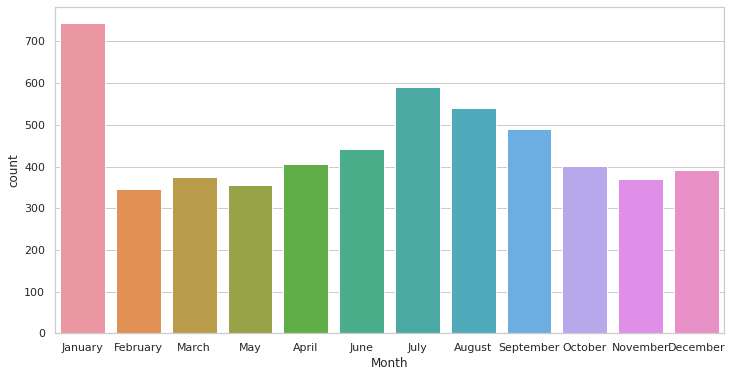

In [24]:
nuevografico = sns.countplot(data=sharks, x= "Month",order= listameses)
nuevografico.figure.savefig("Graficos/Cantidaddemuertesporano.jpg")


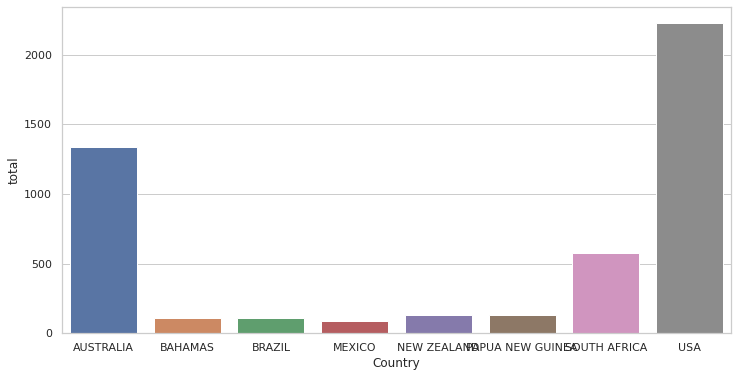

In [25]:
sharks_country = sharks.groupby(['Country']).agg({'Year':'count'}).reset_index().rename(columns={'Year':"total"})
sharks_country = sharks_country[sharks_country['total'] > 80]
grafico2= sns.barplot(data=sharks_country, x= "Country",y= "total")
rcParams['figure.figsize'] = 20,8

In [26]:
grafico2.figure.savefig("Graficos/Muertesporpaises.jpg")


In [29]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Case Number.1', 'Case Number.2', 'Month'],
      dtype='object')

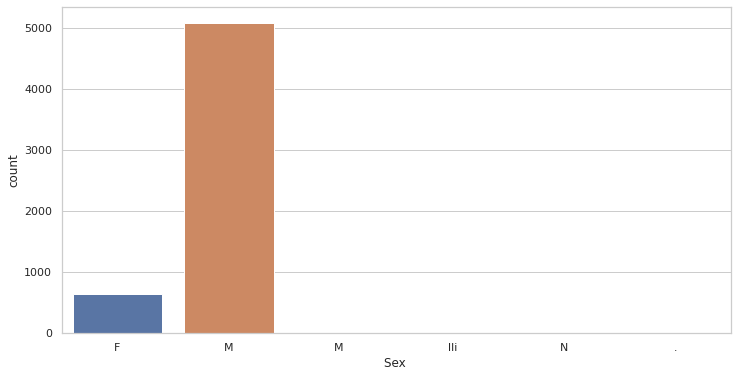

In [8]:
nuevografico3 = sns.countplot(data=sharks, x= "Sex ")

# 5. CONCLUSIONES --> Ir a analysis.ipynb 